<a href="https://colab.research.google.com/github/juangross/IAPy/blob/main/IAPy_tp2_gross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Práctico 2

alumno: Juan Pablo Gross



##**Ejercicio 1**
Se tiene un dataset con información referente a la lectura de gases realizada por una matriz de 6 sensores de bajo costo en instantes sucesivos de tiempo. A estas lecturas, se asocia la información de la actividad realizada en el recinto sensado. 

El conjunto de sensores utilizados se puede agrupar en dos categorías principales:


*    Sensores MQ (MQ2, MQ9, MQ135, MQ137, MQ138) que tienen gran sensibilidad, baja latencia y bajo costo; cada sensor puede responder a diferentes gases;
*    Sensor analógico de gas CO2 (MG-811) que tiene una excelente sensibilidad al dióxido de carbono y apenas se ve afectado por la temperatura y la humedad del aire.
El conjunto de datos contiene 1845 muestras recolectadas que describen 4 situaciones objetivo:
1.   Situación normal - Actividad: aire limpio, una persona que duerme, estudia o descansa. Muestras disponibles: 595.
2.   Preparación de comidas - Actividades: cocinar carne o pasta, verduras fritas. Una o dos personas en la habitación, circulación de aire forzado. Muestras disponibles: 515.
3.   Presencia de humo - Actividad: quemar papel y madera por un corto período de tiempo en una habitación con ventanas y puertas cerradas – Muestras disponibles: 195.
4.   Limpieza - Actividad: uso de detergentes en aerosol y líquidos con amoníaco y/o alcohol. La circulación de aire forzado se puede activar o desactivar - Muestras disponibles: 540.

Cada muestra está compuesta por 7 valores; los primeros seis valores son las salidas de los sensores, mientras que el último es el índice de la acción que generó los valores adquiridos por los mismos. Las cuatro situaciones diferentes están asociadas con una composición del aire distinta, teniendo en
cuenta que cualquier actividad produce sustancias químicas (respiración humana, exhalaciones de procesos metabólicos, liberación de volátiles por combustión y/o oxidación, evaporación de detergentes domésticos, etc.).

Los datos se encuentran en el archivo adjunto denominado "dataset_ADL_clasificacion.csv”. A continuación, se presenta una porción de este dataset:


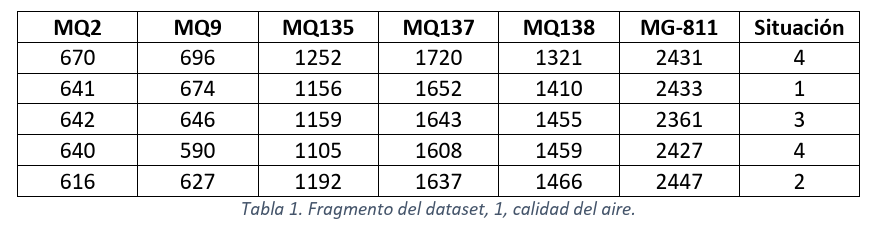


En la columna “Situación” se encuentra codificada la clase que indica si se trata de **una actividad normal (1), preparación de comidas (2), presencia de humo (3) o de limpieza (4).**
El objetivo es determinar si con estas observaciones es posible obtener un modelo que permita **clasificar** cada una de las 4 situaciones objetivo, a partir de los valores arrojados por los sensores.





##preguntas
Detallar y fundamentar cada aspecto de la solución propuesta, incluyendo los aspectos que crea conveniente y respondiendo como mínimo las siguientes premisas:


*   P1. ¿Qué clasificador se ajusta mejor a la solución buscada? ¿Por qué?
*   P2. En base a los resultados obtenidos, ¿Sería posible utilizar el modelo para predecir el comportamiento de nuevas mediciones?
*   P3. Evaluar aspectos relacionados al rendimiento en el proceso de entrenamiento y vincularlos con la relación costo/beneficio. 
*   P4. Ídem para los tiempos de inferencia o consulta, ¿Cuál es fundamental si  Pretendo utilizar un sistema en tiempo real con el modelo desarrollado?
*   P5. De los resultados visualizados en la matriz de confusión, ¿Para todas las clases el modelo seleccionado presenta el mismo comportamiento?
*   P6. ¿Existen problemas evidentes en este dataset? Si es así, ¿Cuáles son y cómo  Los solucionaría?
*   P7. ¿Son necesarios todos los sensores para que el modelo pueda identificar de manera eficiente las clases de interés?

##Respuestas

##P1. ¿Qué clasificador se ajusta mejor a la solución buscada? ¿Por qué?

basado en la comparativa implementada por medio de la clase **model_performance** se pede inferir que para este conjunto de datos, el clasificador KNN presenta el mejor desempeño, en cuanto a precisión y exactitud, seguido por el clasificador XGB.

##P2. En base a los resultados obtenidos, ¿Sería posible utilizar el modelo para predecir el comportamiento de nuevas mediciones?

##P3. Evaluar aspectos relacionados al rendimiento en el proceso de entrenamiento y vincularlos con la relación costo/beneficio. 

##P4. Ídem para los tiempos de inferencia o consulta, ¿Cuál es fundamental si  Pretendo utilizar un sistema en tiempo real con el modelo desarrollado?

##P5. De los resultados visualizados en la matriz de confusión, ¿Para todas las clases el modelo seleccionado presenta el mismo comportamiento?

Agrandes rasgos todos los clasificadores se comportaron de manera similar. 
Lo que se que puede resaltar es que para los clasificadores probados, en la matriz de confusión todos dan un falso positivo para la situación en la que se está realizando limpieza y la clisifican como situación **normal**. Es un error potencialmente peligroso y debe ser tenido en cuenta a la hora de seleccionar el algoritmo adecuado.


##P6. ¿Existen problemas evidentes en este dataset? Si es así, ¿Cuáles son y cómo  Los solucionaría?

Tal como se indica en el análisis exploratorio inicial, el conjunto de datos parece estar completo, pero al analizar el conteo de cada situación es posible apreciar que para uno de los casos la cantidad total de datos disponble es mucho menor que en los otros casos. Ello puede provocar que las estimaciones tengan una precisión limitada.
La solución que se me ocurre es tomar mas datos, o recortar el conjnto total limitando la cantidad de datos a analizar a la misma cantidad que ofrece el estado 3. 
Otra alternativa (pero menos deseada por mi parte) es utilizar algún método estadístico para "inventar" datos estadísticamente correctos.
Existen algunas filas duplicadas en los datos, sería cuestión de eliminarlas para sanear el conjunto de datos.

##P7. ¿Son necesarios todos los sensores para que el modelo pueda identificar de manera eficiente las clases de interés?

En base al análisis exploratorio inicial, se observa que existe una gran correlación entre los datos de los sensores MQx. En principio y a ojo decidiría quedarme con una sóla de las señales MQx, los datos del sensor de gas MG811 y los datos de situación. Tesndría que hacer un análisis estadístico my fino sobre los datos MQx para decidir con cual de ellos quedarme


In [1]:
#importo material de trabajo
!git clone https://github.com/juangross/IAPy

Cloning into 'IAPy'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 140.45 KiB | 8.26 MiB/s, done.


In [2]:
#funciones básicas
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#imprimo versiones de software utilizado
import os
import sys

#imprimo las versiones de las librerías que voy usando
print('Librerías usadas')
print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
#print ('numpy: '+ np.version.version)
print('numpy: {}'.format(np.__version__))
#print ('numpy: '+ np.__version__)

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Librerías usadas
python: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
matplotlib: 3.5.3
numpy: 1.22.4


## Análisis Exploratorio de Datos

In [3]:
!unzip ./IAPy/dataset_ADL_clasificacion.zip

Archive:  ./IAPy/dataset_ADL_clasificacion.zip
  inflating: dataset_ADL_clasificacion.csv  


In [4]:
# Lectura del dataset
dataset = pd.read_csv("dataset_ADL_clasificacion.csv")

In [5]:
dataset

MQ2  MQ9  MQ135  MQ137  MQ138  MG-811  Situacion
0     670  696   1252   1720   1321    2431          4
1     641  674   1156   1652   1410    2433          4
2     642  646   1159   1643   1455    2361          4
3     640  590   1105   1608   1459    2427          4
4     616  627   1192   1637   1466    2447          4
...   ...  ...    ...    ...    ...     ...        ...
1840  862  826   1564   1768   1540    2037          4
1841  917  821   1571   1779   1543    2008          4
1842  925  832   1582   1776   1545    1989          4
1843  928  840   1587   1787   1538    1986          4
1844  926  840   1606   1785   1555    1996          4

[1845 rows x 7 columns]

In [6]:
dataset.info()
# No hay valores faltantes, todos son valores enteros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MQ2        1845 non-null   int64
 1   MQ9        1845 non-null   int64
 2   MQ135      1845 non-null   int64
 3   MQ137      1845 non-null   int64
 4   MQ138      1845 non-null   int64
 5   MG-811     1845 non-null   int64
 6   Situacion  1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


In [7]:
dataset.describe()
# Notar que los rangos cambian según el tipo de sensor
# Esto se puede escalar/normalizar

MQ2          MQ9        MQ135        MQ137        MQ138  \
count  1845.000000  1845.000000  1845.000000  1845.000000  1845.000000   
mean    587.458537   653.465583  1166.036856  1609.279675  1302.121951   
std     190.456217   173.360131   208.791130   118.820436   279.456215   
min     263.000000   346.000000   753.000000  1323.000000   773.000000   
25%     430.000000   517.000000   995.000000  1508.000000  1086.000000   
50%     551.000000   622.000000  1162.000000  1610.000000  1264.000000   
75%     713.000000   746.000000  1309.000000  1693.000000  1553.000000   
max    1266.000000  1388.000000  1738.000000  1926.000000  1948.000000   

            MG-811    Situacion  
count  1845.000000  1845.000000  
mean   2246.295935     2.368564  
std     181.001073     1.209905  
min    1797.000000     1.000000  
25%    2137.000000     1.000000  
50%    2265.000000     2.000000  
75%    2372.000000     4.000000  
max    2703.000000     4.000000

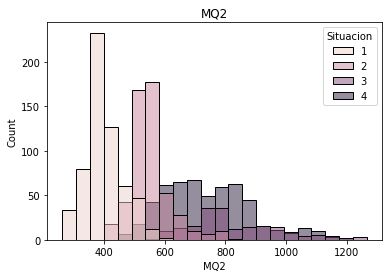

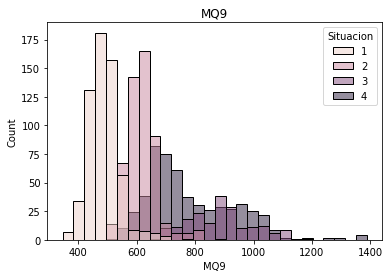

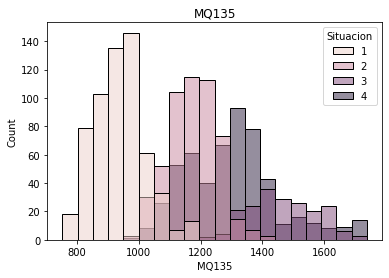

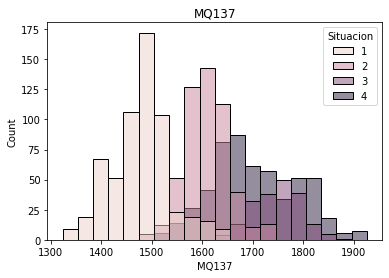

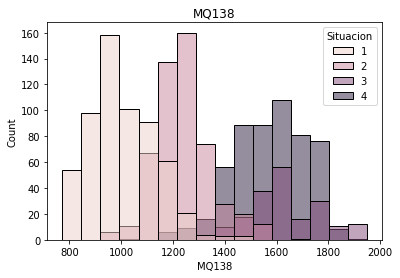

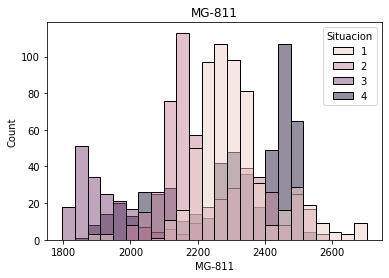

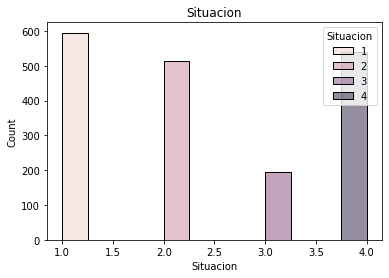

In [8]:
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='Situacion')
    plt.show()

# A simple vista pareciera que las clases no se separan fácilmente por umbrales en las variables de entrada
# Hay un desbalance en las clases de salida

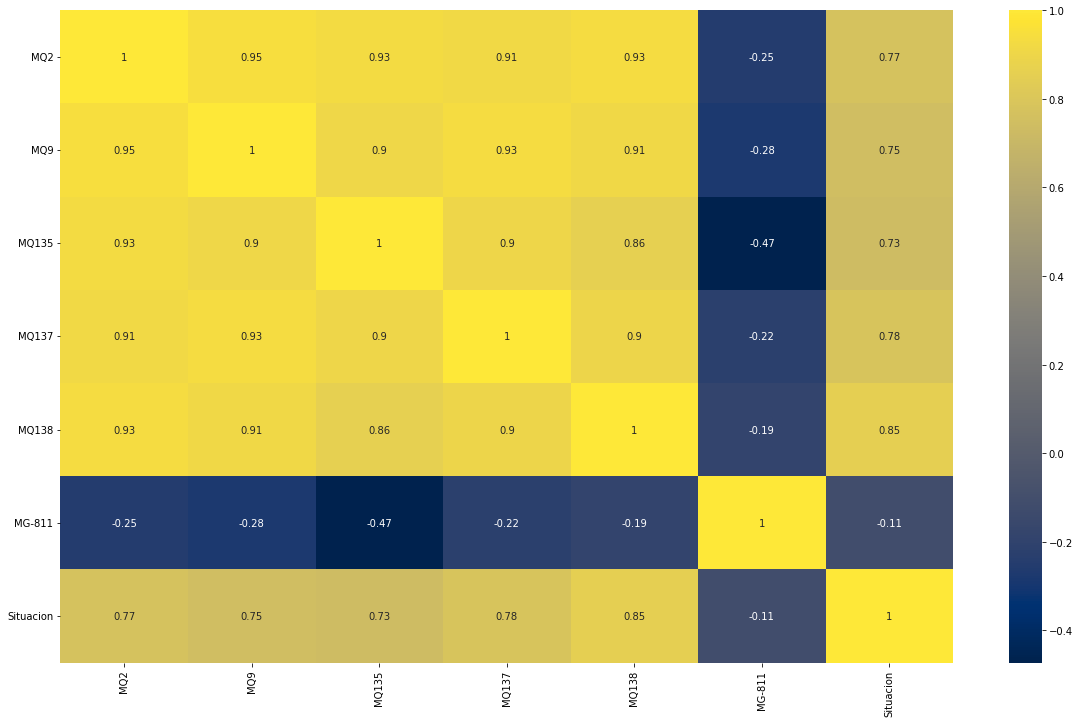

In [ ]:
sns.heatmap(data=dataset.corr(), annot=True, cmap="cividis")  # Con cmap podemos cambiar la paleta de colores para el mapeo en la escala, hay un montón pre-fabricadas

fig=plt.gcf()
fig.set_size_inches(20,12)

plt.show()
# Podemos ver que las variables están bastantes correlacionadas, con esta información podemos tomar decisiones importantes

#obs jp
Las variables MQ2, MQ9, MQ135, MA137, MQ13 se encuentran muy correlacionadas entre ellas porque tienen poca dispersión entre sus valores como se ve en el heatmap.
Algo parecido pasa con la variable **situación**

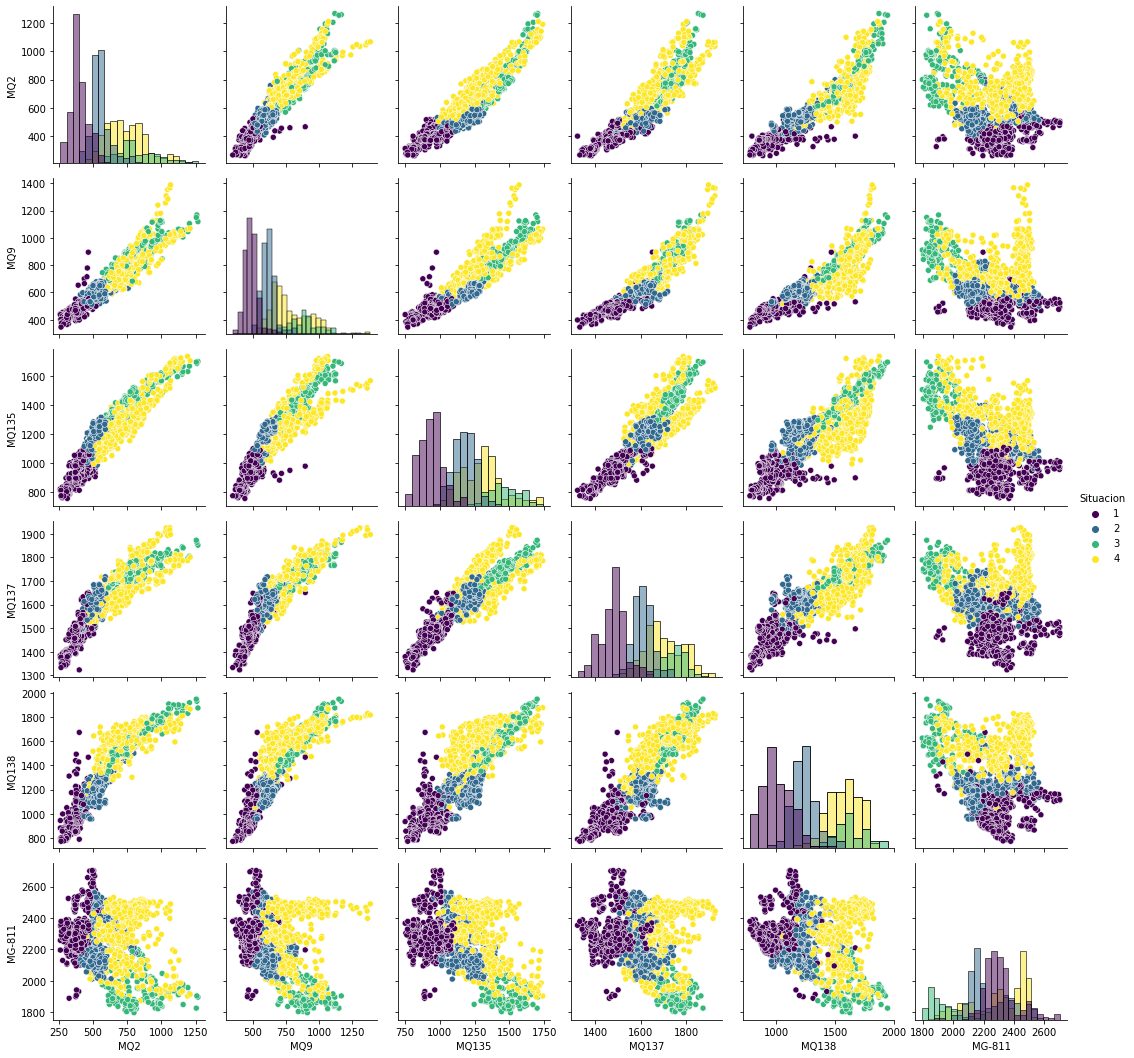

In [ ]:
g = sns.PairGrid(dataset, hue="Situacion", palette='viridis')   # Con palette seteamos paleta de colores también
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
# Acá simplemente graficamos para todas las variables del dataset, podemos sacar mucha información
# Hay 1845 muestras, va a tardar un poco (30 s aprox.), ya se comparan todas las posibidades variable-variable respecto a las salidas

## Análisis de Datos Interactivo (Plus)

Piloto automático: otra manera de realizar el análisis...

In [ ]:
from pandas_profiling import ProfileReport
# Se debería poder usar así, pero en Colab hay un par de dependencia obsoletas para esto
# Abajo los pasos

<ipython-input-9-37985b045d2e>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


**IMPORTANTE**: Reiniciar Kernel para aplicar cambios, aprece un botón al instalar lo de arriba.

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

El informe de creación de perfiles permite buscar valores atípicos, valores faltantes y distribuciones. Podemos ver si los datos están desequilibrados. Por lo general, te notifica respecto a una situación a atender (correlaciones altas por ejemplo)

In [ ]:
%%time
profile = ProfileReport(dataset,
                        title="Análisis de la Calidad del Aire",
                        dataset={"description": "Esta es una descriptión del dataset...",
                                 "copyright_holder": "Ing. Axel Skrauba",
                                 "copyright_year": "2023",
                                },
                        explorative=True,
                       )
profile

CPU times: user 28.9 ms, sys: 0 ns, total: 28.9 ms
Wall time: 50.6 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Preprocesamiento

In [ ]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset['Situacion']
X = dataset.drop('Situacion', axis=1)

# Acá iría algún tratamiento especial según lo analizado (después lo vemos)
from sklearn.model_selection import train_test_split
# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
                        # shuffle mezcla el dataset, si miramos el csv... están bastante agrupados por categorías
                        # random_state establece una semilla para el mezclador, así se garantiza repetibilidad
                        # test_size establece el tamaño porcentual para el subset de test

## Selección del Modelo

**Comparación de Clasificadores**

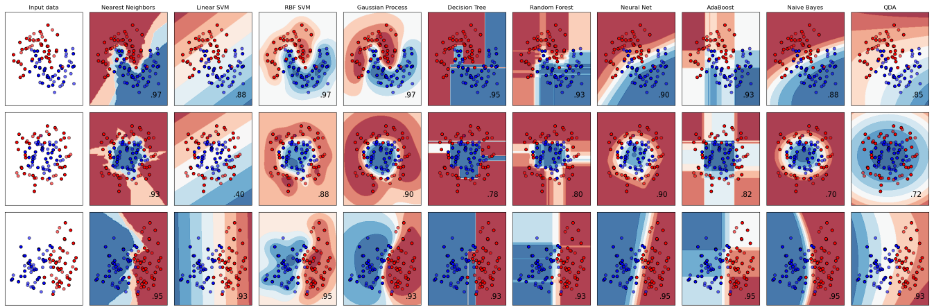

Importación de funciones para métricas generales y construcción de un dataframe para comparar el desempeño de los modelos utilizados.

### Importaciones y funciones comunes

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

import time

# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

Para detalles y demás: https://scikit-learn.org/stable/supervised_learning.html

In [ ]:
def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))
    
    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]


def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.91      0.90       179
           2       0.83      0.80      0.82       157
           3       0.77      0.84      0.80        51
           4       0.88      0.86      0.87       167

    accuracy                           0.86       554
   macro avg       0.84      0.85      0.85       554
weighted avg       0.86      0.86      0.86       554

#######################################
Accuracy: 85.74%
Recall: 85.74%
Precision: 85.79%
F1-Score: 85.73%
MCC: 80.15%
Tiempo de entrenamiento: 0.1696 s
Tiempo de predicción: 0.0063 s
Tiempo total: 0.1760 s
#######################################


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


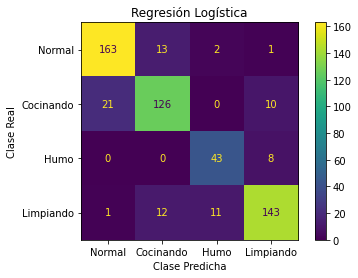

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Regresión Logística")

### Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95       179
           2       0.91      0.88      0.89       157
           3       0.75      0.82      0.79        51
           4       0.89      0.88      0.89       167

    accuracy                           0.90       554
   macro avg       0.87      0.88      0.88       554
weighted avg       0.90      0.90      0.90       554

#######################################
Accuracy: 89.89%
Recall: 89.89%
Precision: 90.01%
F1-Score: 89.93%
MCC: 85.93%
Tiempo de entrenamiento: 0.0081 s
Tiempo de predicción: 0.0014 s
Tiempo total: 0.0095 s
#######################################


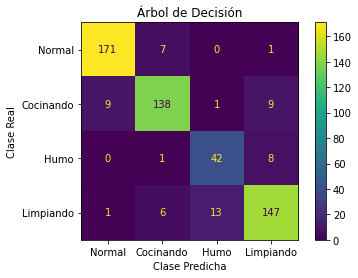

In [ ]:
plot_confusion_matrix(y_test, pred_tree, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Árbol de Decisión")

### K Vecinos Cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97       179
           2       0.93      0.95      0.94       157
           3       0.89      0.96      0.92        51
           4       0.96      0.92      0.94       167

    accuracy                           0.95       554
   macro avg       0.94      0.95      0.94       554
weighted avg       0.95      0.95      0.95       554

#######################################
Accuracy: 94.77%
Recall: 94.77%
Precision: 94.84%
F1-Score: 94.77%
MCC: 92.73%
Tiempo de entrenamiento: 0.0091 s
Tiempo de predicción: 0.0433 s
Tiempo total: 0.0524 s
#######################################


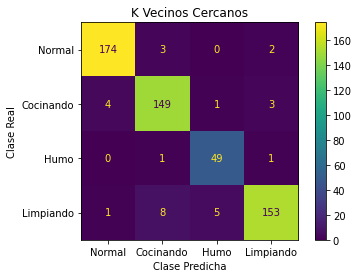

In [ ]:
plot_confusion_matrix(y_test, pred_knn, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="K Vecinos Cercanos")

### eXtreme Gradient Boosting (XGB)

In [ ]:
from xgboost import XGBClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
xgbc_clf = XGBClassifier()
xgbc_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_xgbc = xgbc_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_xgbc))
muestra_metricas("XGBClassifier", y_test, pred_xgbc, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.96       179
           2       0.93      0.92      0.93       157
           3       0.83      0.94      0.88        51
           4       0.95      0.90      0.93       167

    accuracy                           0.93       554
   macro avg       0.92      0.93      0.92       554
weighted avg       0.93      0.93      0.93       554

#######################################
Accuracy: 93.32%
Recall: 93.32%
Precision: 93.47%
F1-Score: 93.34%
MCC: 90.73%
Tiempo de entrenamiento: 0.5037 s
Tiempo de predicción: 0.0098 s
Tiempo total: 0.5135 s
#######################################


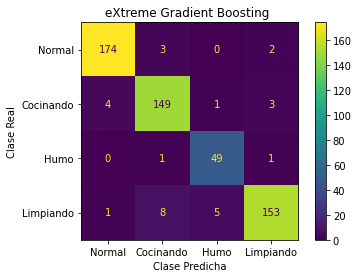

In [ ]:
plot_confusion_matrix(y_test, pred_knn, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="eXtreme Gradient Boosting ")

### Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((100,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.83      0.93      0.88       179
           2       0.85      0.64      0.73       157
           3       0.86      0.75      0.80        51
           4       0.80      0.92      0.85       167

    accuracy                           0.83       554
   macro avg       0.84      0.81      0.82       554
weighted avg       0.83      0.83      0.82       554

#######################################
Accuracy: 82.67%
Recall: 82.67%
Precision: 83.04%
F1-Score: 82.14%
MCC: 76.12%
Tiempo de entrenamiento: 1.3145 s
Tiempo de predicción: 0.0106 s
Tiempo total: 1.3251 s
#######################################


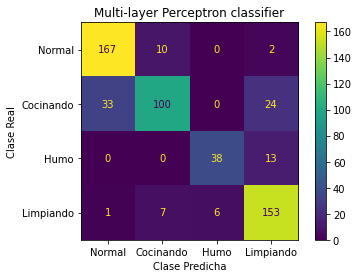

In [ ]:
plot_confusion_matrix(y_test, pred_nn, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Multi-layer Perceptron classifier")

### Support Vector Machines (SVMs)

https://scikit-learn.org/stable/modules/svm.html#classification


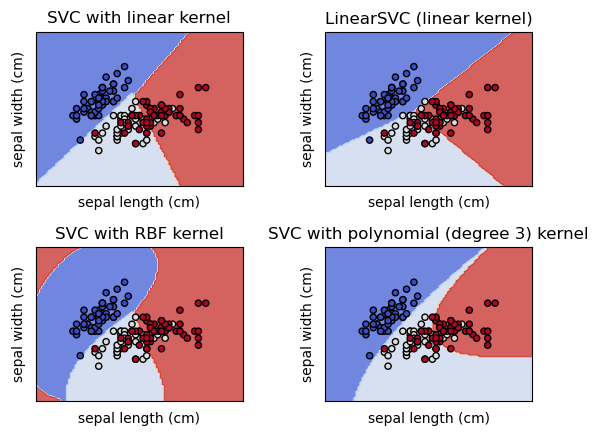

In [ ]:
from sklearn.svm import SVC

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_svm = svm_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm))
muestra_metricas("SVM", y_test, pred_svm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.91      0.92      0.92       179
           2       0.83      0.82      0.82       157
           3       0.66      0.78      0.71        51
           4       0.85      0.79      0.82       167

    accuracy                           0.84       554
   macro avg       0.81      0.83      0.82       554
weighted avg       0.84      0.84      0.84       554

#######################################
Accuracy: 84.12%
Recall: 84.12%
Precision: 84.43%
F1-Score: 84.19%
MCC: 77.97%
Tiempo de entrenamiento: 0.0291 s
Tiempo de predicción: 0.0183 s
Tiempo total: 0.0474 s
#######################################


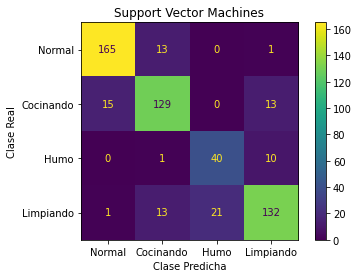

In [ ]:
plot_confusion_matrix(y_test, pred_svm, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Support Vector Machines")

### Comparación de los Modelos

Para evaluar qué modelo se ajusta mejor a nuestros requerimientos.
Por ejemplo, si la velocidad de inferencia es crucial (tiempo en la consulta del modelo)... nos interesaría el menor tiempo a la hora de predecir.

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

### **Importancia de las características para el modelo**

**Importancia de las características para el modelo**

***SHAP (SHapley Additive exPlanations)***

SHAP es un enfoque teórico de juegos para explicar el resultado de cualquier modelo de aprendizaje automático. Conecta la asignación óptima de créditos con explicaciones locales utilizando los valores clásicos de Shapley de la teoría de juegos y sus extensiones relacionadas.

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 33.9 MB/s eta 0:00:00


In [ ]:
import shap         # https://shap.readthedocs.io/en/latest/

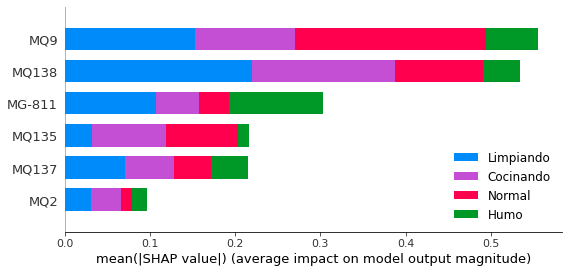

In [ ]:
# Para modelos basados en Árboles
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Normal", "Cocinando", "Humo", "Limpiando"])

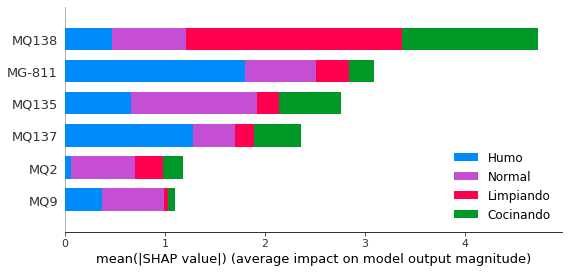

In [ ]:
explainer = shap.TreeExplainer(xgbc_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Normal", "Cocinando", "Humo", "Limpiando"])